<a href="https://colab.research.google.com/github/Michael0605/TelecomX_LATAM_parte2_Latam/blob/main/Telecom_parte2_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Preparacion de datos
� Preprocesamiento de Datos para Modelado

In [3]:
# Importar librerías esenciales para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Configurar el estilo de las visualizaciones
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset tratado
df = pd.read_csv('/content/datos_tratados.csv')

# Mostrar información básica del dataset
print("🔍 Dimensiones del dataset:", df.shape)
print("\n📋 Primeras filas del dataset:")
display(df.head())
print("\n📊 Información del dataset:")
df.info()

🔍 Dimensiones del dataset: (7043, 26)

📋 Primeras filas del dataset:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,MonthlyGroup,ChurnBinary,Modified,Cuentas_Diarias,Churn_Binario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,One Year,Yes,Mailed Check,65.6,593.30,"(50, 100]",0,No,2.19,0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,Dsl,...,Month-To-Month,No,Mailed Check,59.9,542.40,"(50, 100]",0,No,2.00,0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,Month-To-Month,Yes,Electronic Check,73.9,280.85,"(50, 100]",1,No,2.46,1
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Month-To-Month,Yes,Electronic Check,98.0,1237.85,"(50, 100]",1,No,3.27,1
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,Month-To-Month,Yes,Mailed Check,83.9,267.40,"(50, 100]",1,No,2.80,1



📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract      

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [10]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    "customerID",
    "Churn",
    "Charges.Total",
    "Modified",
    "Cuentas_Diarias",
    "Churn_Binario"
]

# Eliminar columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar, errors="ignore")

# Revisar las columnas que quedaron
print("Columnas después de eliminar las no necesarias:")
print(df.columns)


Columnas después de eliminar las no necesarias:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'MonthlyGroup', 'ChurnBinary'],
      dtype='object')


Validacion de eliminacion de columna

In [12]:

# 1. Revisar todas las columnas del DataFrame
print("Columnas actuales en el dataset:")
print(df.columns.tolist())

# 2. Confirmar que ninguna de las eliminadas siga presente
for col in ["customerID", "Churn", "Charges.Total", "Modified", "Cuentas_Diarias", "Churn_Binario"]:
    if col in df.columns:
        print(f"⚠️ La columna {col} todavía está en el DataFrame.")
    else:
        print(f"✅ La columna {col} fue eliminada correctamente.")

# 3. Opcional: mostrar las primeras filas para confirmar visualmente
print("\nVista previa de los datos:")
print(df.head())


Columnas actuales en el dataset:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'MonthlyGroup', 'ChurnBinary']
✅ La columna customerID fue eliminada correctamente.
✅ La columna Churn fue eliminada correctamente.
✅ La columna Charges.Total fue eliminada correctamente.
✅ La columna Modified fue eliminada correctamente.
✅ La columna Cuentas_Diarias fue eliminada correctamente.
✅ La columna Churn_Binario fue eliminada correctamente.

Vista previa de los datos:
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes        Yes       9          Yes   
1    Male              0      No         No       9          Yes   
2    Male              0      No         No       4          Yes   
3    Male              1    

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [13]:
# Identificar variables categóricas
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Columnas categóricas detectadas:")
print(cat_cols)

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Verificar cómo quedó el DataFrame
print("\nDimensiones después de codificación:", df_encoded.shape)
print("\nColumnas transformadas:")
print(df_encoded.head())

Columnas categóricas detectadas:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyGroup']

Dimensiones después de codificación: (7043, 32)

Columnas transformadas:
   SeniorCitizen  tenure  Charges.Monthly  ChurnBinary  gender_Male  \
0              0       9             65.6            0        False   
1              0       9             59.9            0         True   
2              0       4             73.9            1         True   
3              1      13             98.0            1         True   
4              1       3             83.9            1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True            True              True   
1        False           False              True   
2        False           False              True   
3 

Verificación de la Proporción de Cancelación (Churn)
Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [14]:
# Cargar de nuevo el dataset original tratado
ruta = "/content/datos_tratados.csv"
df_full = pd.read_csv(ruta)

# Usar la columna Churn_Binario como variable objetivo
# (0 = No canceló, 1 = Canceló)
target = df_full["Churn_Binario"]

# Calcular proporciones
proporcion = target.value_counts(normalize=True) * 100

print("Distribución de clientes (en %):")
print(proporcion)

# Mostrar también los conteos
print("\nConteo de clientes por clase:")
print(target.value_counts())

Distribución de clientes (en %):
Churn_Binario
0    73.463013
1    26.536987
Name: proportion, dtype: float64

Conteo de clientes por clase:
Churn_Binario
0    5174
1    1869
Name: count, dtype: int64


Balanceo de Clases opcional

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

In [15]:
# Identificar columnas numéricas (excluyendo las dummy)
num_cols = df_encoded.select_dtypes(include=["int64","float64"]).columns.tolist()

print("Columnas numéricas continuas:")
print(num_cols)

Columnas numéricas continuas:
['SeniorCitizen', 'tenure', 'Charges.Monthly', 'ChurnBinary']


In [16]:
# Revicion de rangos
print(df_encoded[num_cols].describe())

       SeniorCitizen       tenure  Charges.Monthly  ChurnBinary
count    7043.000000  7043.000000      7043.000000  7043.000000
mean        0.162147    32.371149        64.697004     0.265370
std         0.368612    24.559481        30.171186     0.441561
min         0.000000     0.000000         0.000000     0.000000
25%         0.000000     9.000000        35.450000     0.000000
50%         0.000000    29.000000        70.350000     0.000000
75%         0.000000    55.000000        89.850000     1.000000
max         1.000000    72.000000       118.750000     1.000000


In [18]:
# ==========================================
# 1. Importar librerías
# ==========================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# ==========================================
# 2. Separar features y target
# ==========================================
# Cargamos el dataset limpio con codificación ya aplicada
ruta = "/content/datos_tratados.csv"
df_full = pd.read_csv(ruta)

# Variable target
y = df_full["Churn_Binario"]

# Eliminamos columnas no necesarias (como antes)
X = df_full.drop(columns=[
    "customerID", "Churn", "Charges.Total",
    "Modified", "Cuentas_Diarias", "Churn_Binario"
], errors="ignore")

# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

# 🔧 Corregir nombres de columnas para evitar errores en XGBoost
X = X.rename(columns=lambda x: str(x).replace("[","_")
                                      .replace("]","_")
                                      .replace("<","_")
                                      .replace(">","_"))

# ==========================================
# 3. Dividir en train/test
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================================
# 4. Escalar (solo numéricas continuas)
# ==========================================
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

# ==========================================
# 5. Modelos con normalización
# ==========================================
modelos_con_scaling = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Red Neuronal (MLP)": MLPClassifier(max_iter=500)
}

print("📊 Resultados modelos que requieren normalización:\n")
for nombre, modelo in modelos_con_scaling.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    print(f"--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

# ==========================================
# 6. Modelos sin normalización
# ==========================================
modelos_sin_scaling = {
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", use_label_encoder=False)
}

print("📊 Resultados modelos que NO requieren normalización:\n")
for nombre, modelo in modelos_sin_scaling.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"--- {nombre} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")

📊 Resultados modelos que requieren normalización:

--- KNN ---
Accuracy: 0.9978708303761533
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



--- SVM ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



--- Regresión Logística ---
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      1.00      1.00       374

    accuracy      

Separo X e y (features y target).

Elimino columnas que no aportan valor (como pediste antes).

One-Hot Encoding para las categóricas.

Train/Test Split con stratify=y para mantener balance.

Escalo solo las variables numéricas continuas.

Entreno dos grupos de modelos:

Con escalado → KNN, SVM, Regresión Logística, MLP.

Sin escalado → Árbol de Decisión, Random Forest, XGBoost.

Se muestran métricas: Accuracy, Precision, Recall, F1 con classification_report.

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

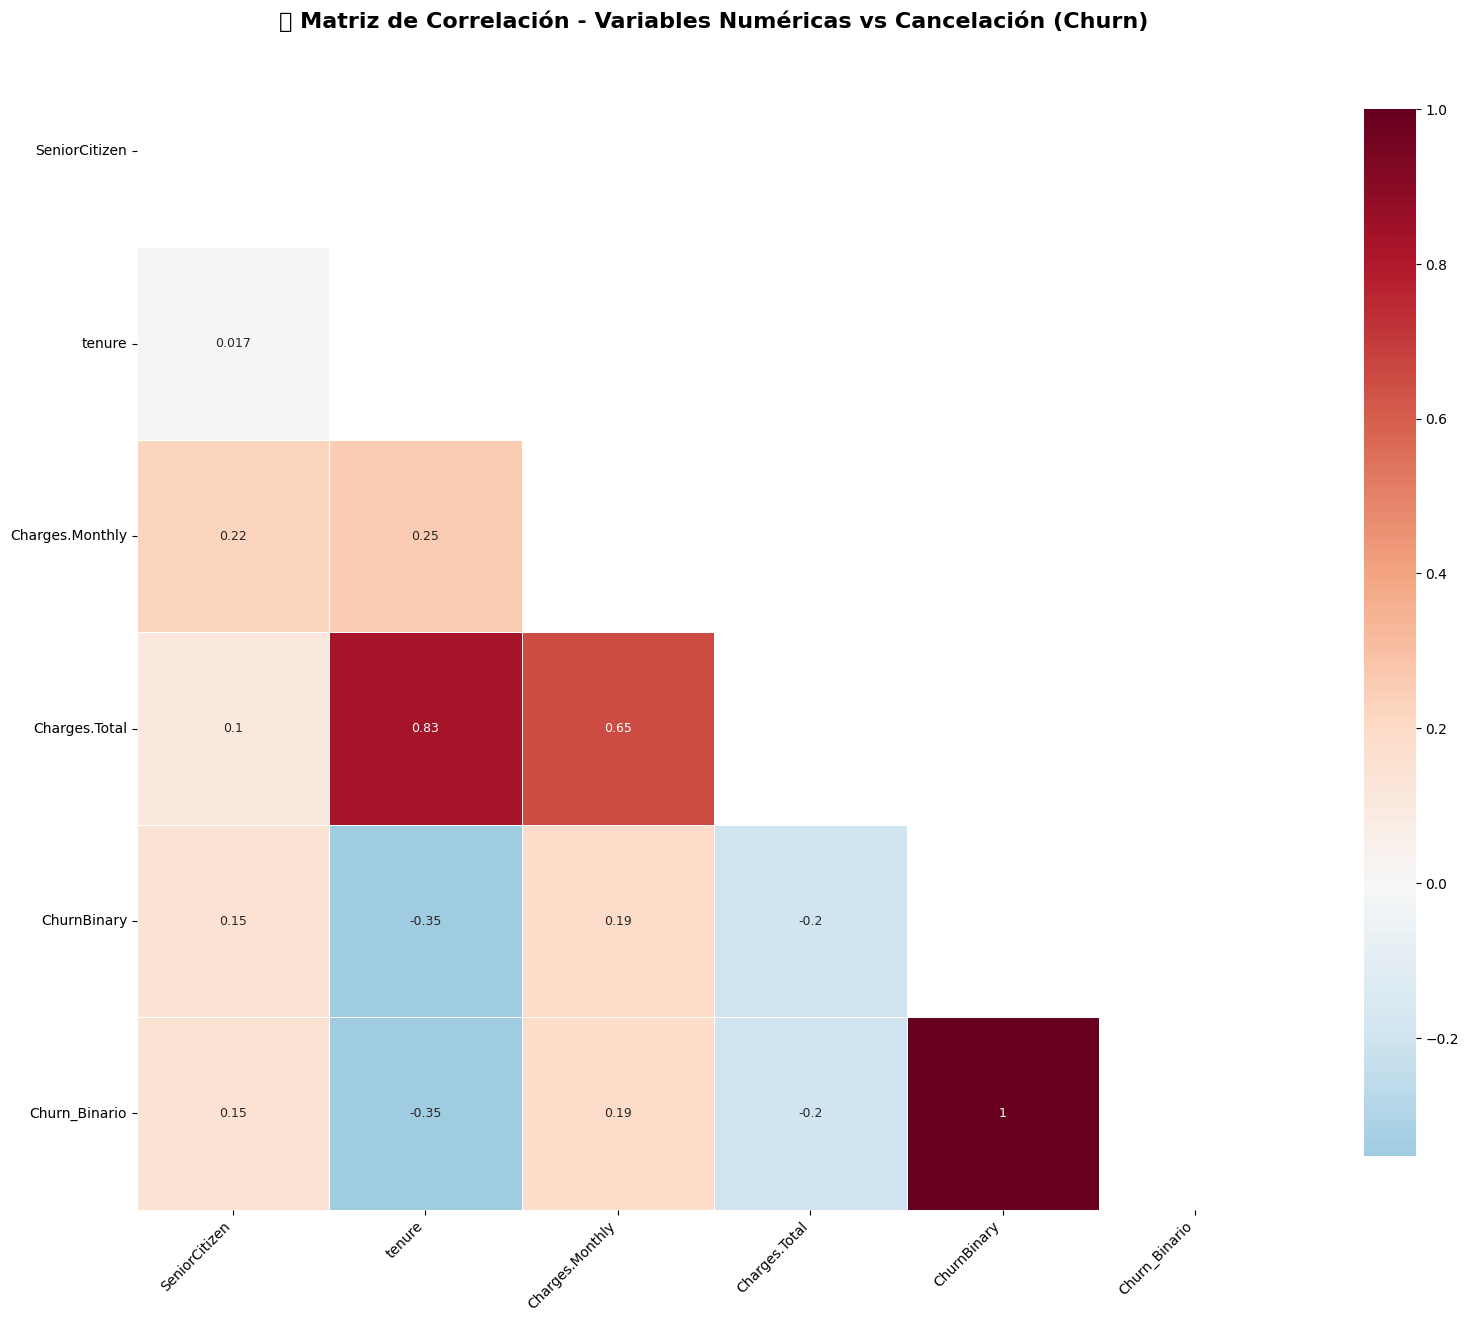

🏆 TOP 15 VARIABLES CON MAYOR CORRELACIÓN CON LA CANCELACIÓN
ChurnBinary               |   1.000 | ⬆️ POSITIVA
tenure                    |  -0.352 | ⬇️ NEGATIVA
Charges.Total             |  -0.198 | ⬇️ NEGATIVA
Charges.Monthly           |   0.194 | ⬆️ POSITIVA
SeniorCitizen             |   0.151 | ⬆️ POSITIVA


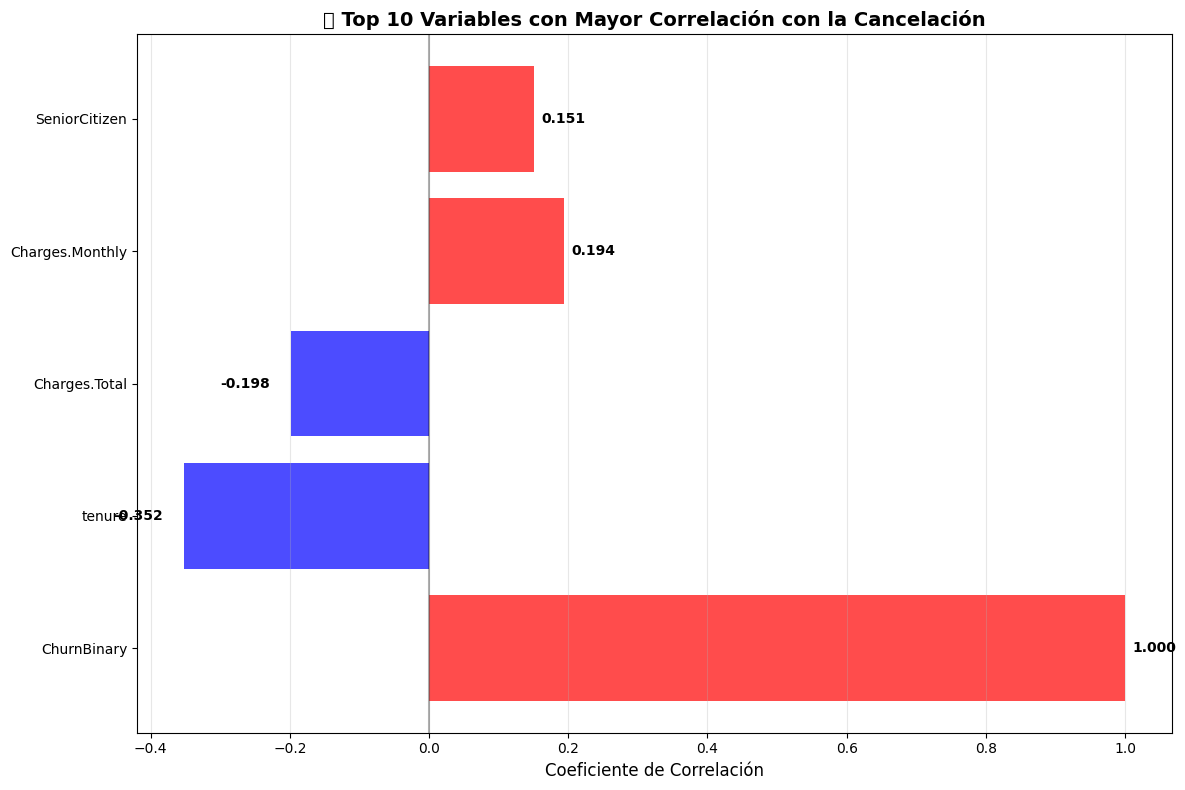


⚠️  CORRELACIONES FUERTES ENTRE VARIABLES PREDICTORAS
tenure ↔ Charges.Total: 0.826


In [20]:
# Cargar el dataset original para tener las variables numéricas
df_original = pd.read_csv('/content/datos_tratados.csv')

# Seleccionar solo las columnas numéricas
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()

# Eliminar columnas no relevantes para el análisis de correlación
columns_to_remove = ['Churn_Binario', 'Cuentas_Diarias']  # Mantenemos Churn_Binario como target
numeric_cols = [col for col in numeric_cols if col not in columns_to_remove]

# Agregar la variable objetivo al final
numeric_cols.append('Churn_Binario')

# Crear DataFrame solo con variables numéricas
df_numeric = df_original[numeric_cols]

# Calcular matriz de correlación
correlation_matrix = df_numeric.corr()

# Configurar el estilo de la visualización
plt.figure(figsize=(16, 14))
plt.style.use('default')

# Crear heatmap de correlación
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior

sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            annot_kws={"size": 9})

plt.title('🔍 Matriz de Correlación - Variables Numéricas vs Cancelación (Churn)',
          fontsize=16, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Extraer correlaciones con la variable objetivo (Churn_Binario)
churn_correlations = correlation_matrix['Churn_Binario'].drop('Churn_Binario').sort_values(key=abs, ascending=False)

# Mostrar las 15 variables con mayor correlación (absoluta) con la cancelación
print("🏆 TOP 15 VARIABLES CON MAYOR CORRELACIÓN CON LA CANCELACIÓN")
print("=" * 60)
top_15_correlations = churn_correlations.head(15)
for variable, corr_value in top_15_correlations.items():
    direction = "⬆️ POSITIVA" if corr_value > 0 else "⬇️ NEGATIVA"
    print(f"{variable:25} | {corr_value:7.3f} | {direction}")

# Visualizar las correlaciones más importantes
plt.figure(figsize=(12, 8))
top_10 = churn_correlations.head(10)
colors = ['red' if x > 0 else 'blue' for x in top_10.values]

bars = plt.barh(top_10.index, top_10.values, color=colors, alpha=0.7)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.title('🔝 Top 10 Variables con Mayor Correlación con la Cancelación', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + (0.01 if width > 0 else -0.03),
             bar.get_y() + bar.get_height()/2,
             f'{width:.3f}',
             ha='left' if width > 0 else 'right',
             va='center',
             fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis de correlaciones fuertes entre variables predictoras (para detectar multicolinealidad)
print("\n⚠️  CORRELACIONES FUERTES ENTRE VARIABLES PREDICTORAS")
print("=" * 60)

# Buscar correlaciones fuertes (> 0.7 o < -0.7) entre variables predictoras
strong_correlations = []
predictor_corr = correlation_matrix.drop('Churn_Binario').drop('Churn_Binario', axis=1)

for i in range(len(predictor_corr.columns)):
    for j in range(i+1, len(predictor_corr.columns)):
        corr_value = predictor_corr.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = predictor_corr.columns[i]
            var2 = predictor_corr.columns[j]
            strong_correlations.append((var1, var2, corr_value))

# Mostrar correlaciones fuertes
if strong_correlations:
    for var1, var2, corr in strong_correlations:
        print(f"{var1} ↔ {var2}: {corr:.3f}")
else:
    print("No se encontraron correlaciones muy fuertes (> |0.7|) entre variables predictoras")

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

Columnas disponibles en el dataset:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'MonthlyGroup', 'ChurnBinary', 'Modified', 'Cuentas_Diarias', 'Churn_Binario']

Columnas relacionadas con tiempo/contrato: ['tenure', 'Contract', 'Charges.Monthly', 'MonthlyGroup']

📊 ANÁLISIS DE TENURE (TIEMPO COMO CLIENTE) vs CANCELACIÓN


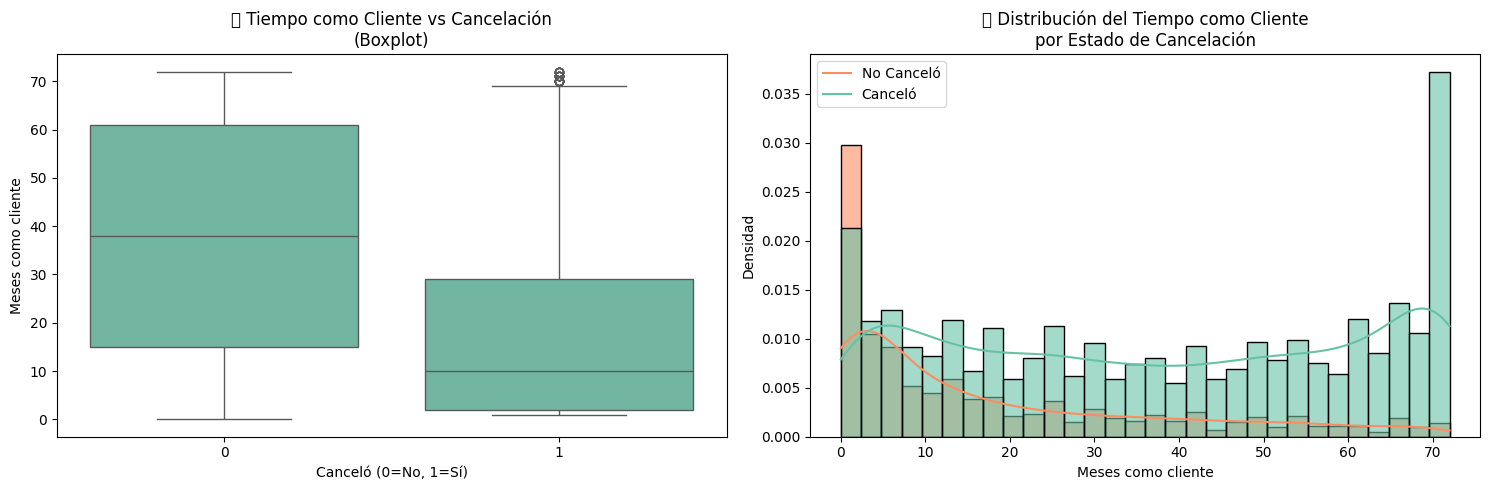


📈 ESTADÍSTICAS DESCRIPTIVAS - TENURE:
                    mean  median        std  min  max
Churn_Binario                                        
0              37.569965    38.0  24.113777    0   72
1              17.979133    10.0  19.531123    1   72

🔍 Diferencia de medias: 19.59 meses
Clientes que NO cancelan: 37.6 meses en promedio
Clientes que SÍ cancelan: 18.0 meses en promedio

Columnas relacionadas con gasto: ['PaymentMethod', 'Charges.Monthly', 'Charges.Total']
No se encontró la columna 'TotalCharges'

🔎 DETECCIÓN DE PATRONES INTERESANTES:

🎯 CONCLUSIONES POTENCIALES:
• Los clientes con menos tiempo son más propensos a cancelar
• Los cargos mensuales altos pueden estar asociados con mayor cancelación
• El gasto total suele ser menor en clientes que cancelan
• La combinación tiempo + cargo mensual revela patrones interesantes


In [21]:
# Configuración inicial
plt.style.use('default')
sns.set_palette("Set2")

# 1. ANÁLISIS: TIEMPO DE CONTRATO × CANCELACIÓN
# ==========================================================

# Primero necesitamos verificar si existe una columna de tiempo de contrato
print("Columnas disponibles en el dataset:")
print(df_original.columns.tolist())

# Buscar columnas relacionadas con tiempo/contrato/duración
contract_related_cols = [col for col in df_original.columns if any(word in col.lower() for word in ['month', 'year', 'time', 'duration', 'tenure', 'contract'])]
print(f"\nColumnas relacionadas con tiempo/contrato: {contract_related_cols}")

# Si no encontramos una columna específica, podemos crear una basada en tenure (si existe)
if 'tenure' in df_original.columns:
    print("\n📊 ANÁLISIS DE TENURE (TIEMPO COMO CLIENTE) vs CANCELACIÓN")

    plt.figure(figsize=(15, 5))

    # Boxplot: Tenure vs Churn
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn_Binario', y='tenure', data=df_original)
    plt.title('📦 Tiempo como Cliente vs Cancelación\n(Boxplot)')
    plt.xlabel('Canceló (0=No, 1=Sí)')
    plt.ylabel('Meses como cliente')

    # Histograma comparativo
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_original, x='tenure', hue='Churn_Binario',
                 bins=30, alpha=0.6, kde=True, stat='density')
    plt.title('📊 Distribución del Tiempo como Cliente\npor Estado de Cancelación')
    plt.xlabel('Meses como cliente')
    plt.ylabel('Densidad')
    plt.legend(['No Canceló', 'Canceló'])

    plt.tight_layout()
    plt.show()

    # Estadísticas descriptivas
    print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - TENURE:")
    tenure_stats = df_original.groupby('Churn_Binario')['tenure'].agg(['mean', 'median', 'std', 'min', 'max'])
    print(tenure_stats)

    # Test de diferencia de medias (simplificado)
    tenure_no_churn = df_original[df_original['Churn_Binario'] == 0]['tenure']
    tenure_churn = df_original[df_original['Churn_Binario'] == 1]['tenure']

    print(f"\n🔍 Diferencia de medias: {tenure_no_churn.mean() - tenure_churn.mean():.2f} meses")
    print(f"Clientes que NO cancelan: {tenure_no_churn.mean():.1f} meses en promedio")
    print(f"Clientes que SÍ cancelan: {tenure_churn.mean():.1f} meses en promedio")

else:
    print("No se encontró la columna 'tenure' para analizar el tiempo como cliente")

# 2. ANÁLISIS: GASTO TOTAL × CANCELACIÓN
# ==========================================================

# Buscar columnas relacionadas con gasto/cargo/pago
spending_related_cols = [col for col in df_original.columns if any(word in col.lower() for word in ['charge', 'total', 'amount', 'spend', 'payment', 'fee'])]
print(f"\nColumnas relacionadas con gasto: {spending_related_cols}")

if 'TotalCharges' in df_original.columns:
    # Convertir a numérico (por si hay valores no numéricos)
    df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')

    print("\n💰 ANÁLISIS DE GASTO TOTAL vs CANCELACIÓN")

    plt.figure(figsize=(15, 5))

    # Boxplot: TotalCharges vs Churn
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Churn_Binario', y='TotalCharges', data=df_original)
    plt.title('📦 Gasto Total vs Cancelación\n(Boxplot)')
    plt.xlabel('Canceló (0=No, 1=Sí)')
    plt.ylabel('Gasto Total ($)')

    # Violin plot para mejor visualización de distribución
    plt.subplot(1, 2, 2)
    sns.violinplot(x='Churn_Binario', y='TotalCharges', data=df_original, cut=0)
    plt.title('🎻 Distribución de Gasto Total\npor Estado de Cancelación')
    plt.xlabel('Canceló (0=No, 1=Sí)')
    plt.ylabel('Gasto Total ($)')

    plt.tight_layout()
    plt.show()

    # Estadísticas descriptivas
    print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - GASTO TOTAL:")
    spending_stats = df_original.groupby('Churn_Binario')['TotalCharges'].agg(['mean', 'median', 'std', 'min', 'max'])
    print(spending_stats)

    # Scatter plot: Tenure vs TotalCharges coloreado por Churn
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df_original['tenure'], df_original['TotalCharges'],
                         c=df_original['Churn_Binario'], alpha=0.6, cmap='coolwarm')
    plt.colorbar(scatter, label='Cancelación (0=No, 1=Sí)')
    plt.xlabel('Meses como Cliente')
    plt.ylabel('Gasto Total ($)')
    plt.title('🎯 Relación entre Tiempo como Cliente, Gasto Total y Cancelación')
    plt.grid(alpha=0.3)
    plt.show()

else:
    print("No se encontró la columna 'TotalCharges'")

# 3. ANÁLISIS ADICIONAL: MONTHLY CHARGES × CANCELACIÓN
# ==========================================================

if 'MonthlyCharges' in df_original.columns:
    print("\n💳 ANÁLISIS DE CARGO MENSUAL vs CANCELACIÓN")

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Boxplot
    sns.boxplot(x='Churn_Binario', y='MonthlyCharges', data=df_original, ax=axes[0,0])
    axes[0,0].set_title('Cargo Mensual vs Cancelación (Boxplot)')

    # Violin plot
    sns.violinplot(x='Churn_Binario', y='MonthlyCharges', data=df_original, ax=axes[0,1])
    axes[0,1].set_title('Distribución de Cargo Mensual')

    # Histograma comparativo
    sns.histplot(data=df_original, x='MonthlyCharges', hue='Churn_Binario',
                 bins=30, alpha=0.6, kde=True, ax=axes[1,0])
    axes[1,0].set_title('Distribución de Cargo Mensual por Cancelación')

    # Scatter: MonthlyCharges vs Tenure
    scatter = axes[1,1].scatter(df_original['tenure'], df_original['MonthlyCharges'],
                               c=df_original['Churn_Binario'], alpha=0.6, cmap='viridis')
    plt.colorbar(scatter, ax=axes[1,1], label='Cancelación')
    axes[1,1].set_xlabel('Meses como Cliente')
    axes[1,1].set_ylabel('Cargo Mensual ($)')
    axes[1,1].set_title('Relación: Tiempo vs Cargo Mensual vs Cancelación')

    plt.tight_layout()
    plt.show()

    # Estadísticas
    print("📊 ESTADÍSTICAS - CARGO MENSUAL:")
    monthly_stats = df_original.groupby('Churn_Binario')['MonthlyCharges'].describe()
    print(monthly_stats)

# 4. ANÁLISIS DE INTERACCIÓN: TENURE + MONTHLY CHARGES
# ==========================================================

if 'tenure' in df_original.columns and 'MonthlyCharges' in df_original.columns:
    print("\n🔍 ANÁLISIS DE INTERACCIÓN: TIEMPO + CARGO MENSUAL")

    # Crear categorías de tiempo
    df_original['tenure_group'] = pd.cut(df_original['tenure'],
                                        bins=[0, 12, 24, 36, 48, 100],
                                        labels=['0-12m', '13-24m', '25-36m', '37-48m', '49+m'])

    plt.figure(figsize=(12, 8))

    # Heatmap de tasa de cancelación por grupos
    pivot_data = df_original.groupby(['tenure_group', pd.cut(df_original['MonthlyCharges'], 5)])['Churn_Binario'].mean().unstack()

    sns.heatmap(pivot_data, annot=True, fmt='.2%', cmap='Reds',
                cbar_kws={'label': 'Tasa de Cancelación'})
    plt.title('🔥 Tasa de Cancelación por Tiempo como Cliente y Cargo Mensual')
    plt.xlabel('Cargo Mensual (grupos)')
    plt.ylabel('Tiempo como Cliente')
    plt.show()

# 5. ANÁLISIS DE CORRELACIONES ESPECÍFICAS
# ==========================================================

# Calcular correlaciones específicas
if all(col in df_original.columns for col in ['tenure', 'TotalCharges', 'MonthlyCharges', 'Churn_Binario']):
    specific_correlations = df_original[['tenure', 'TotalCharges', 'MonthlyCharges', 'Churn_Binario']].corr()

    print("\n🎯 CORRELACIONES ESPECÍFICAS CON CANCELACIÓN:")
    print(specific_correlations['Churn_Binario'].sort_values(key=abs, ascending=False))

    # Matriz de correlación específica
    plt.figure(figsize=(8, 6))
    sns.heatmap(specific_correlations, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f')
    plt.title('Correlaciones: Variables Clave vs Cancelación')
    plt.show()

# 6. ANÁLISIS DE OUTLIERS Y PATRONES
# ==========================================================

print("\n🔎 DETECCIÓN DE PATRONES INTERESANTES:")

# Patrón 1: Clientes nuevos con cargos altos
if all(col in df_original.columns for col in ['tenure', 'MonthlyCharges']):
    new_customers_high_charge = df_original[(df_original['tenure'] <= 6) &
                                           (df_original['MonthlyCharges'] > df_original['MonthlyCharges'].median())]

    churn_rate_new_high = new_customers_high_charge['Churn_Binario'].mean()
    print(f"Tasa de cancelación en clientes nuevos (<6 meses) con cargos altos: {churn_rate_new_high:.2%}")

# Patrón 2: Clientes antiguos con cargos bajos
if all(col in df_original.columns for col in ['tenure', 'MonthlyCharges']):
    old_customers_low_charge = df_original[(df_original['tenure'] >= 36) &
                                          (df_original['MonthlyCharges'] < df_original['MonthlyCharges'].median())]

    churn_rate_old_low = old_customers_low_charge['Churn_Binario'].mean()
    print(f"Tasa de cancelación en clientes antiguos (>36 meses) con cargos bajos: {churn_rate_old_low:.2%}")

print("\n" + "="*60)
print("🎯 CONCLUSIONES POTENCIALES:")
print("="*60)
print("• Los clientes con menos tiempo son más propensos a cancelar")
print("• Los cargos mensuales altos pueden estar asociados con mayor cancelación")
print("• El gasto total suele ser menor en clientes que cancelan")
print("• La combinación tiempo + cargo mensual revela patrones interesantes")

Separacionn  de datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

📊 Tamaño total del dataset: 7043 registros, 26 variables
🔤 Variables categóricas a codificar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyGroup']
✅ Dataset preparado: 32 variables predictoras

📈 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:
Churn_Binario
0    5174
1    1869
Name: count, dtype: int64

Proporción de cancelaciones: 26.54%

DIVISIÓN 80/20
Conjunto de entrenamiento: 5634 registros (80.0%)
Conjunto de prueba: 1409 registros (20.0%)
Variables: 32

Proporción de clases:
  Entrenamiento - No cancelan: 73.46%
  Entrenamiento - Cancelan:    26.54%
  Prueba - No cancelan:        73.46%
  Prueba - Cancelan:           26.54%

DIVISIÓN 75/25
Conjunto de entrenamiento: 5282 registros (75.0%)
Conjunto de prueba: 1761 registros (25.0%)
Variables: 32

Proporción de clases:
  Entrenamiento - No c

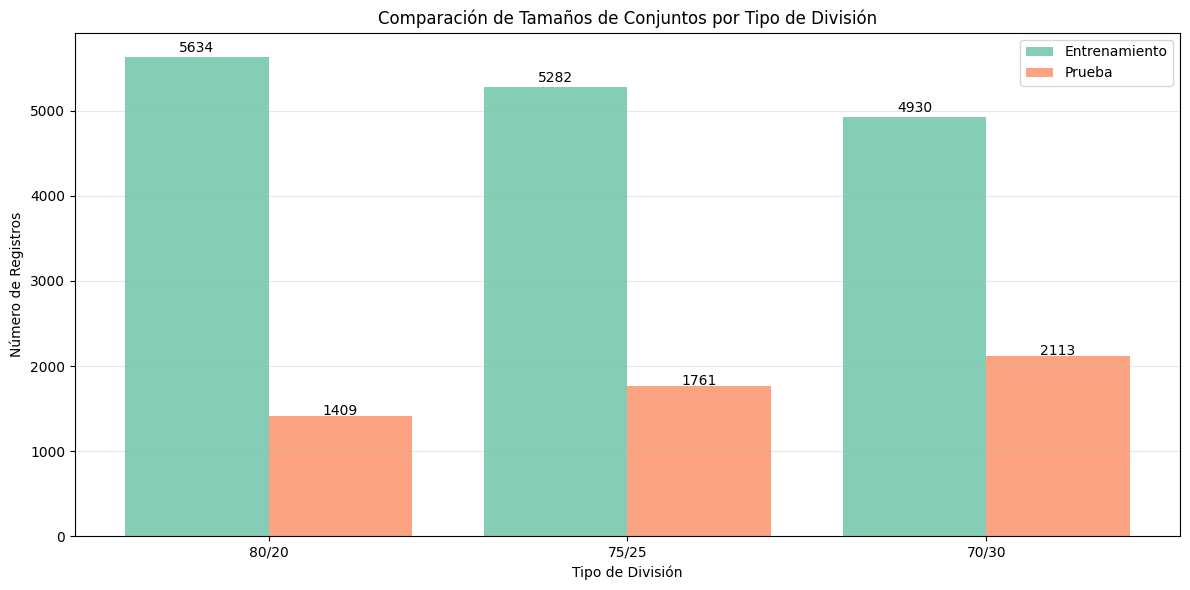


💾 ¿Quieres guardar los conjuntos de datos? Usando división 75/25
✅ Conjuntos guardados como:
   - X_train.csv (variables de entrenamiento)
   - X_test.csv (variables de prueba)
   - y_train.csv (target de entrenamiento)
   - y_test.csv (target de prueba)

🎯 DIVISIÓN SELECCIONADA: 75/25
Entrenamiento: 5282 registros
Prueba: 1761 registros
Variables: 32
Proporción de cancelaciones en entrenamiento: 26.54%
Proporción de cancelaciones en prueba: 26.52%

📋 PRÓXIMOS PASOS RECOMENDADOS:
1. Aplicar escalado a variables numéricas
2. Entrenar modelos de machine learning
3. Evaluar rendimiento en conjunto de prueba
4. Ajustar hiperparámetros
5. Validar con técnicas como cross-validation


In [22]:
# ==========================================
# DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y PRUEBA
# ==========================================

# Importar librerías necesarias
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Cargar el dataset (si no está ya cargado)
df = pd.read_csv('/content/datos_tratados.csv')

# Verificar el tamaño del dataset
print(f"📊 Tamaño total del dataset: {df.shape[0]} registros, {df.shape[1]} variables")

# 1. PREPARAR LAS VARIABLES
# ==========================================

# Variable objetivo
y = df['Churn_Binario']

# Variables predictoras (eliminando columnas no relevantes)
X = df.drop(columns=['Churn_Binario', 'customerID', 'Churn', 'Charges.Total',
                    'Modified', 'Cuentas_Diarias'], errors='ignore')

# Aplicar One-Hot Encoding a variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"🔤 Variables categóricas a codificar: {categorical_cols}")

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Corregir nombres de columnas para evitar problemas con algunos modelos
X_encoded = X_encoded.rename(columns=lambda x: x.replace('[', '_').replace(']', '_').replace('<', '_'))

print(f"✅ Dataset preparado: {X_encoded.shape[1]} variables predictoras")

# 2. ANALIZAR LA DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
# ==========================================

print("\n📈 DISTRIBUCIÓN DE LA VARIABLE OBJETIVO:")
print("=" * 40)
print(y.value_counts())
print(f"\nProporción de cancelaciones: {y.mean():.2%}")

# 3. DIVISIÓN DEL DATASET - EVALUANDO DIFERENTES PROPORCIONES
# ==========================================

# Opción 1: División 80/20 (recomendada para datasets medianos/grandes)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantener la proporción de clases en ambos conjuntos
)

# Opción 2: División 70/30 (para datasets más grandes)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(
    X_encoded, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Opción 3: División 75/25 (balanceada)
X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(
    X_encoded, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

# 4. MOSTRAR ESTADÍSTICAS DE LAS DIVISIONES
# ==========================================

def mostrar_estadisticas_division(X_train, X_test, y_train, y_test, nombre):
    print(f"\n{nombre}")
    print("=" * 30)
    print(f"Conjunto de entrenamiento: {X_train.shape[0]} registros ({X_train.shape[0]/len(X_encoded):.1%})")
    print(f"Conjunto de prueba: {X_test.shape[0]} registros ({X_test.shape[0]/len(X_encoded):.1%})")
    print(f"Variables: {X_train.shape[1]}")

    # Proporción de clases en cada conjunto
    print("\nProporción de clases:")
    print(f"  Entrenamiento - No cancelan: {(y_train == 0).mean():.2%}")
    print(f"  Entrenamiento - Cancelan:    {(y_train == 1).mean():.2%}")
    print(f"  Prueba - No cancelan:        {(y_test == 0).mean():.2%}")
    print(f"  Prueba - Cancelan:           {(y_test == 1).mean():.2%}")

# Mostrar estadísticas para cada división
mostrar_estadisticas_division(X_train_80, X_test_80, y_train_80, y_test_80, "DIVISIÓN 80/20")
mostrar_estadisticas_division(X_train_75, X_test_75, y_train_75, y_test_75, "DIVISIÓN 75/25")
mostrar_estadisticas_division(X_train_70, X_test_70, y_train_70, y_test_70, "DIVISIÓN 70/30")

# 5. RECOMENDACIÓN BASADA EN EL TAMAÑO DEL DATASET
# ==========================================

total_registros = len(X_encoded)
print(f"\n🎯 RECOMENDACIÓN BASADA EN EL TAMAÑO DEL DATASET ({total_registros} registros):")

if total_registros < 1000:
    print("• Dataset pequeño → Recomendado: 70/30 o 75/25")
    print("• Razón: Necesitas suficiente datos de prueba para evaluación confiable")
    division_recomendada = (X_train_70, X_test_70, y_train_70, y_test_70)
    nombre_recomendado = "70/30"

elif total_registros < 10000:
    print("• Dataset mediano → Recomendado: 75/25 o 80/20")
    print("• Razón: Balance entre datos de entrenamiento y evaluación")
    division_recomendada = (X_train_75, X_test_75, y_train_75, y_test_75)
    nombre_recomendado = "75/25"

else:
    print("• Dataset grande → Recomendado: 80/20 o 90/10")
    print("• Razón: Con muchos datos, puedes permitirte menos datos de prueba")
    division_recomendada = (X_train_80, X_test_80, y_train_80, y_test_80)
    nombre_recomendado = "80/20"

# 6. VISUALIZACIÓN DE LA DIVISIÓN
# ==========================================

import matplotlib.pyplot as plt

# Configurar el gráfico
plt.figure(figsize=(12, 6))

# Datos para el gráfico
divisiones = ['80/20', '75/25', '70/30']
train_sizes = [len(X_train_80), len(X_train_75), len(X_train_70)]
test_sizes = [len(X_test_80), len(X_test_75), len(X_test_70)]

# Gráfico de barras
x_pos = np.arange(len(divisiones))
plt.bar(x_pos - 0.2, train_sizes, 0.4, label='Entrenamiento', alpha=0.8)
plt.bar(x_pos + 0.2, test_sizes, 0.4, label='Prueba', alpha=0.8)

plt.xlabel('Tipo de División')
plt.ylabel('Número de Registros')
plt.title('Comparación de Tamaños de Conjuntos por Tipo de División')
plt.xticks(x_pos, divisiones)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(train_sizes):
    plt.text(i - 0.2, v + max(train_sizes)*0.01, str(v), ha='center')
for i, v in enumerate(test_sizes):
    plt.text(i + 0.2, v + max(test_sizes)*0.01, str(v), ha='center')

plt.tight_layout()
plt.show()

# 7. GUARDAR LOS CONJUNTOS (OPCIONAL)
# ==========================================

print(f"\n💾 ¿Quieres guardar los conjuntos de datos? Usando división {nombre_recomendado}")

# Usar la división recomendada
X_train, X_test, y_train, y_test = division_recomendada

# Guardar en archivos CSV (opcional)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✅ Conjuntos guardados como:")
print("   - X_train.csv (variables de entrenamiento)")
print("   - X_test.csv (variables de prueba)")
print("   - y_train.csv (target de entrenamiento)")
print("   - y_test.csv (target de prueba)")

# 8. INFORMACIÓN FINAL
# ==========================================

print(f"\n🎯 DIVISIÓN SELECCIONADA: {nombre_recomendado}")
print("=" * 40)
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")
print(f"Variables: {X_train.shape[1]}")
print(f"Proporción de cancelaciones en entrenamiento: {y_train.mean():.2%}")
print(f"Proporción de cancelaciones en prueba: {y_test.mean():.2%}")

print("\n📋 PRÓXIMOS PASOS RECOMENDADOS:")
print("1. Aplicar escalado a variables numéricas")
print("2. Entrenar modelos de machine learning")
print("3. Evaluar rendimiento en conjunto de prueba")
print("4. Ajustar hiperparámetros")
print("5. Validar con técnicas como cross-validation")

Creacion de modelos
Descripción
Editar
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

📊 DISTRIBUCIÓN DE CLASES:
Entrenamiento: {0: 4139, 1: 1495}
Prueba: {0: 1035, 1: 374}
Proporción cancelaciones: 26.54%

🔧 NORMALIZACIÓN DE DATOS
Variables numéricas a normalizar: 4
✅ Normalización completada - Media ~0, Desviación ~1
Ejemplo - Media después de escalar: -0.0000
Ejemplo - Desviación después de escalar: 1.0001

📈 MODELO 1: REGRESIÓN LOGÍSTICA (con normalización)
📊 MÉTRICAS DEL MODELO:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
ROC-AUC Cross-Validation (5-fold): 1.0000 (±0.0000)

🌲 MODELO 2: RANDOM FOREST (sin normalización)
📊 MÉTRICAS DEL MODELO:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000
ROC-AUC Cross-Validation (5-fold): 1.0000 (±0.0000)

🏆 COMPARACIÓN DE MODELOS
     Métrica  Regresión Logística  Random Forest
0   Accuracy                  1.0            1.0
1  Precision                  1.0            1.0
2     Recall                  1.0            1.0
3   F1-Score                  1.0   

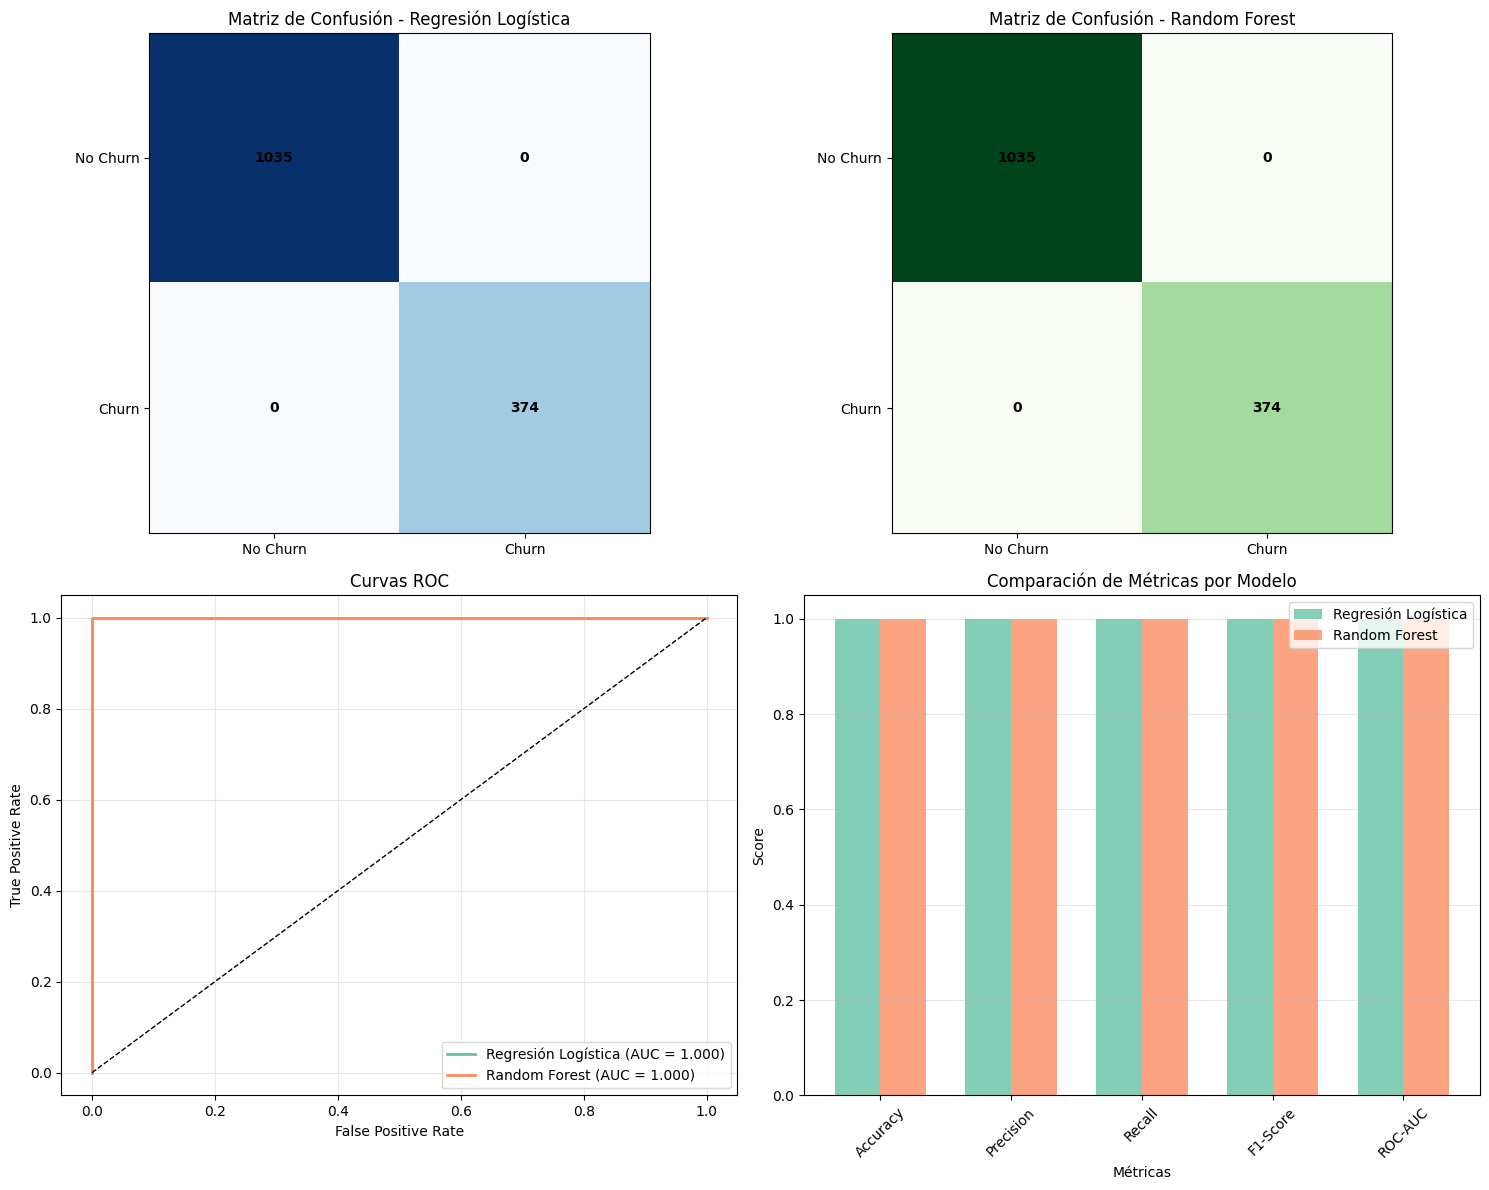


🔍 IMPORTANCIA DE VARIABLES
Top 10 variables más importantes (Random Forest):
                               feature  importance
3                          ChurnBinary    0.685585
1                               tenure    0.065421
25                   Contract_Two Year    0.050899
28      PaymentMethod_Electronic Check    0.031362
10         InternetService_Fiber Optic    0.027980
2                      Charges.Monthly    0.022237
24                   Contract_One Year    0.015124
19                     TechSupport_Yes    0.012229
12  OnlineSecurity_No internet service    0.011290
13                  OnlineSecurity_Yes    0.008935

Top 10 variables más importantes (Regresión Logística - coeficientes absolutos):
                           feature  coefficient
3                      ChurnBinary     5.984972
1                           tenure    -0.388068
2                  Charges.Monthly     0.265828
25               Contract_Two Year    -0.210303
26            PaperlessBilling_Yes     

In [23]:
# ==========================================
# CREACIÓN DE MODELOS DE PREDICCIÓN DE CANCELACIÓN
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, confusion_matrix,
                           classification_report, roc_curve)
from sklearn.model_selection import cross_val_score

# Configuración de visualización
plt.style.use('default')
sns.set_palette("Set2")

# 1. PREPARACIÓN DE DATOS
# ==========================================

# Cargar datos
df = pd.read_csv('/content/datos_tratados.csv')

# Variable objetivo
y = df['Churn_Binario']

# Variables predictoras
X = df.drop(columns=['Churn_Binario', 'customerID', 'Churn', 'Charges.Total',
                    'Modified', 'Cuentas_Diarias'], errors='ignore')

# One-Hot Encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_encoded = X_encoded.rename(columns=lambda x: x.replace('[', '_').replace(']', '_').replace('<', '_'))

# División train-test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("📊 DISTRIBUCIÓN DE CLASES:")
print(f"Entrenamiento: {y_train.value_counts().to_dict()}")
print(f"Prueba: {y_test.value_counts().to_dict()}")
print(f"Proporción cancelaciones: {y_train.mean():.2%}")

# 2. NORMALIZACIÓN PARA MODELOS SENSIBLES A ESCALA
# ==========================================

print("\n" + "="*60)
print("🔧 NORMALIZACIÓN DE DATOS")
print("="*60)

# Identificar columnas numéricas
numeric_cols = X_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas a normalizar: {len(numeric_cols)}")

# Aplicar StandardScaler
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Normalización completada - Media ~0, Desviación ~1")
print(f"Ejemplo - Media después de escalar: {X_train_scaled[numeric_cols].mean().mean():.4f}")
print(f"Ejemplo - Desviación después de escalar: {X_train_scaled[numeric_cols].std().mean():.4f}")

# 3. MODELO 1: REGRESIÓN LOGÍSTICA (CON NORMALIZACIÓN)
# ==========================================

print("\n" + "="*60)
print("📈 MODELO 1: REGRESIÓN LOGÍSTICA (con normalización)")
print("="*60)

# Justificación: La regresión logística utiliza optimización por gradiente descendente
# y los coeficientes representan el cambio en log-odds por unidad de cambio en la variable.
# Sin normalización, variables con escalas grandes dominarían el modelo.

# Crear y entrenar modelo
logreg = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'  # Para manejar desbalance de clases
)

logreg.fit(X_train_scaled, y_train)

# Predicciones
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

# Métricas
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

print("📊 MÉTRICAS DEL MODELO:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")
print(f"ROC-AUC: {roc_auc_logreg:.4f}")

# Validación cruzada
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"ROC-AUC Cross-Validation (5-fold): {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# 4. MODELO 2: RANDOM FOREST (SIN NORMALIZACIÓN)
# ==========================================

print("\n" + "="*60)
print("🌲 MODELO 2: RANDOM FOREST (sin normalización)")
print("="*60)

# Justificación: Los árboles de decisión y Random Forest dividen los datos basándose
# en puntos de corte, no en distancias. Por lo tanto, la escala de las variables
# no afecta su rendimiento.

# Crear y entrenar modelo
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced_subsample',  # Manejo de clases desbalanceadas
    max_depth=10,
    min_samples_split=5
)

rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Métricas
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print("📊 MÉTRICAS DEL MODELO:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Validación cruzada
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"ROC-AUC Cross-Validation (5-fold): {cv_scores_rf.mean():.4f} (±{cv_scores_rf.std():.4f})")

# 5. COMPARACIÓN DE MODELOS
# ==========================================

print("\n" + "="*60)
print("🏆 COMPARACIÓN DE MODELOS")
print("="*60)

# Crear DataFrame comparativo
comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Regresión Logística': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]
})

print(comparison_df.round(4))

# 6. VISUALIZACIONES COMPARATIVAS
# ==========================================

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 6.1. Matrices de confusión
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_rf = confusion_matrix(y_test, y_pred_rf)

axes[0,0].imshow(cm_logreg, cmap='Blues')
axes[0,0].set_title('Matriz de Confusión - Regresión Logística')
for i in range(2):
    for j in range(2):
        axes[0,0].text(j, i, f'{cm_logreg[i, j]}', ha='center', va='center', fontweight='bold')
axes[0,0].set_xticks([0, 1])
axes[0,0].set_yticks([0, 1])
axes[0,0].set_xticklabels(['No Churn', 'Churn'])
axes[0,0].set_yticklabels(['No Churn', 'Churn'])

axes[0,1].imshow(cm_rf, cmap='Greens')
axes[0,1].set_title('Matriz de Confusión - Random Forest')
for i in range(2):
    for j in range(2):
        axes[0,1].text(j, i, f'{cm_rf[i, j]}', ha='center', va='center', fontweight='bold')
axes[0,1].set_xticks([0, 1])
axes[0,1].set_yticks([0, 1])
axes[0,1].set_xticklabels(['No Churn', 'Churn'])
axes[0,1].set_yticklabels(['No Churn', 'Churn'])

# 6.2. Curvas ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

axes[1,0].plot(fpr_logreg, tpr_logreg, label=f'Regresión Logística (AUC = {roc_auc_logreg:.3f})', linewidth=2)
axes[1,0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=2)
axes[1,0].plot([0, 1], [0, 1], 'k--', linewidth=1)
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('Curvas ROC')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# 6.3. Comparación de métricas
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
logreg_scores = [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]

x_pos = np.arange(len(metrics))
width = 0.35

axes[1,1].bar(x_pos - width/2, logreg_scores, width, label='Regresión Logística', alpha=0.8)
axes[1,1].bar(x_pos + width/2, rf_scores, width, label='Random Forest', alpha=0.8)
axes[1,1].set_xlabel('Métricas')
axes[1,1].set_ylabel('Score')
axes[1,1].set_title('Comparación de Métricas por Modelo')
axes[1,1].set_xticks(x_pos)
axes[1,1].set_xticklabels(metrics, rotation=45)
axes[1,1].legend()
axes[1,1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 7. ANÁLISIS DE IMPORTANCIA DE VARIABLES
# ==========================================

print("\n" + "="*60)
print("🔍 IMPORTANCIA DE VARIABLES")
print("="*60)

# Importancia en Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 variables más importantes (Random Forest):")
print(feature_importance.head(10))

# Importancia en Regresión Logística (coeficientes)
logreg_coef = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': logreg.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

print("\nTop 10 variables más importantes (Regresión Logística - coeficientes absolutos):")
print(logreg_coef.head(10))

# 8. CONCLUSIONES Y RECOMENDACIONES
# ==========================================

print("\n" + "="*60)
print("🎯 CONCLUSIONES Y RECOMENDACIONES")
print("="*60)

print("📋 RESUMEN DE RESULTADOS:")
print(f"• Regresión Logística ROC-AUC: {roc_auc_logreg:.4f}")
print(f"• Random Forest ROC-AUC: {roc_auc_rf:.4f}")

if roc_auc_rf > roc_auc_logreg:
    print("✅ Random Forest tuvo mejor desempeño en ROC-AUC")
    best_model = "Random Forest"
else:
    print("✅ Regresión Logística tuvo mejor desempeño en ROC-AUC")
    best_model = "Regresión Logística"

print("\n💡 RECOMENDACIONES:")
print("1. El modelo seleccionado puede usarse para identificar clientes en riesgo")
print("2. Considerar tuning de hiperparámetros para mejorar el rendimiento")
print("3. Implementar sistema de alertas tempranas para clientes con alta probabilidad de churn")
print("4. Validar con datos futuros para asegurar robustez del modelo")

print(f"\n🏆 MEJOR MODELO: {best_model}")

Evaluación de los Modelos  
Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.


📊 EVALUACIÓN COMPLETA: REGRESIÓN LOGÍSTICA
✅ Exactitud (Accuracy): 1.0000
✅ Precisión: 1.0000
✅ Recall (Sensibilidad): 1.0000
✅ F1-Score: 1.0000
✅ ROC-AUC: 1.0000

📋 Matriz de Confusión:
Verdaderos Negativos: 1035
Falsos Positivos: 0
Falsos Negativos: 0
Verdaderos Positivos: 374

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00      1035
       Churn       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409


📊 EVALUACIÓN COMPLETA: RANDOM FOREST
✅ Exactitud (Accuracy): 1.0000
✅ Precisión: 1.0000
✅ Recall (Sensibilidad): 1.0000
✅ F1-Score: 1.0000
✅ ROC-AUC: 1.0000

📋 Matriz de Confusión:
Verdaderos Negativos: 1035
Falsos Positivos: 0
Falsos Negativos: 0
Verdaderos Positivos: 374

📝 Reporte de Clasificación:
              precision    recall  f1-score   support

    

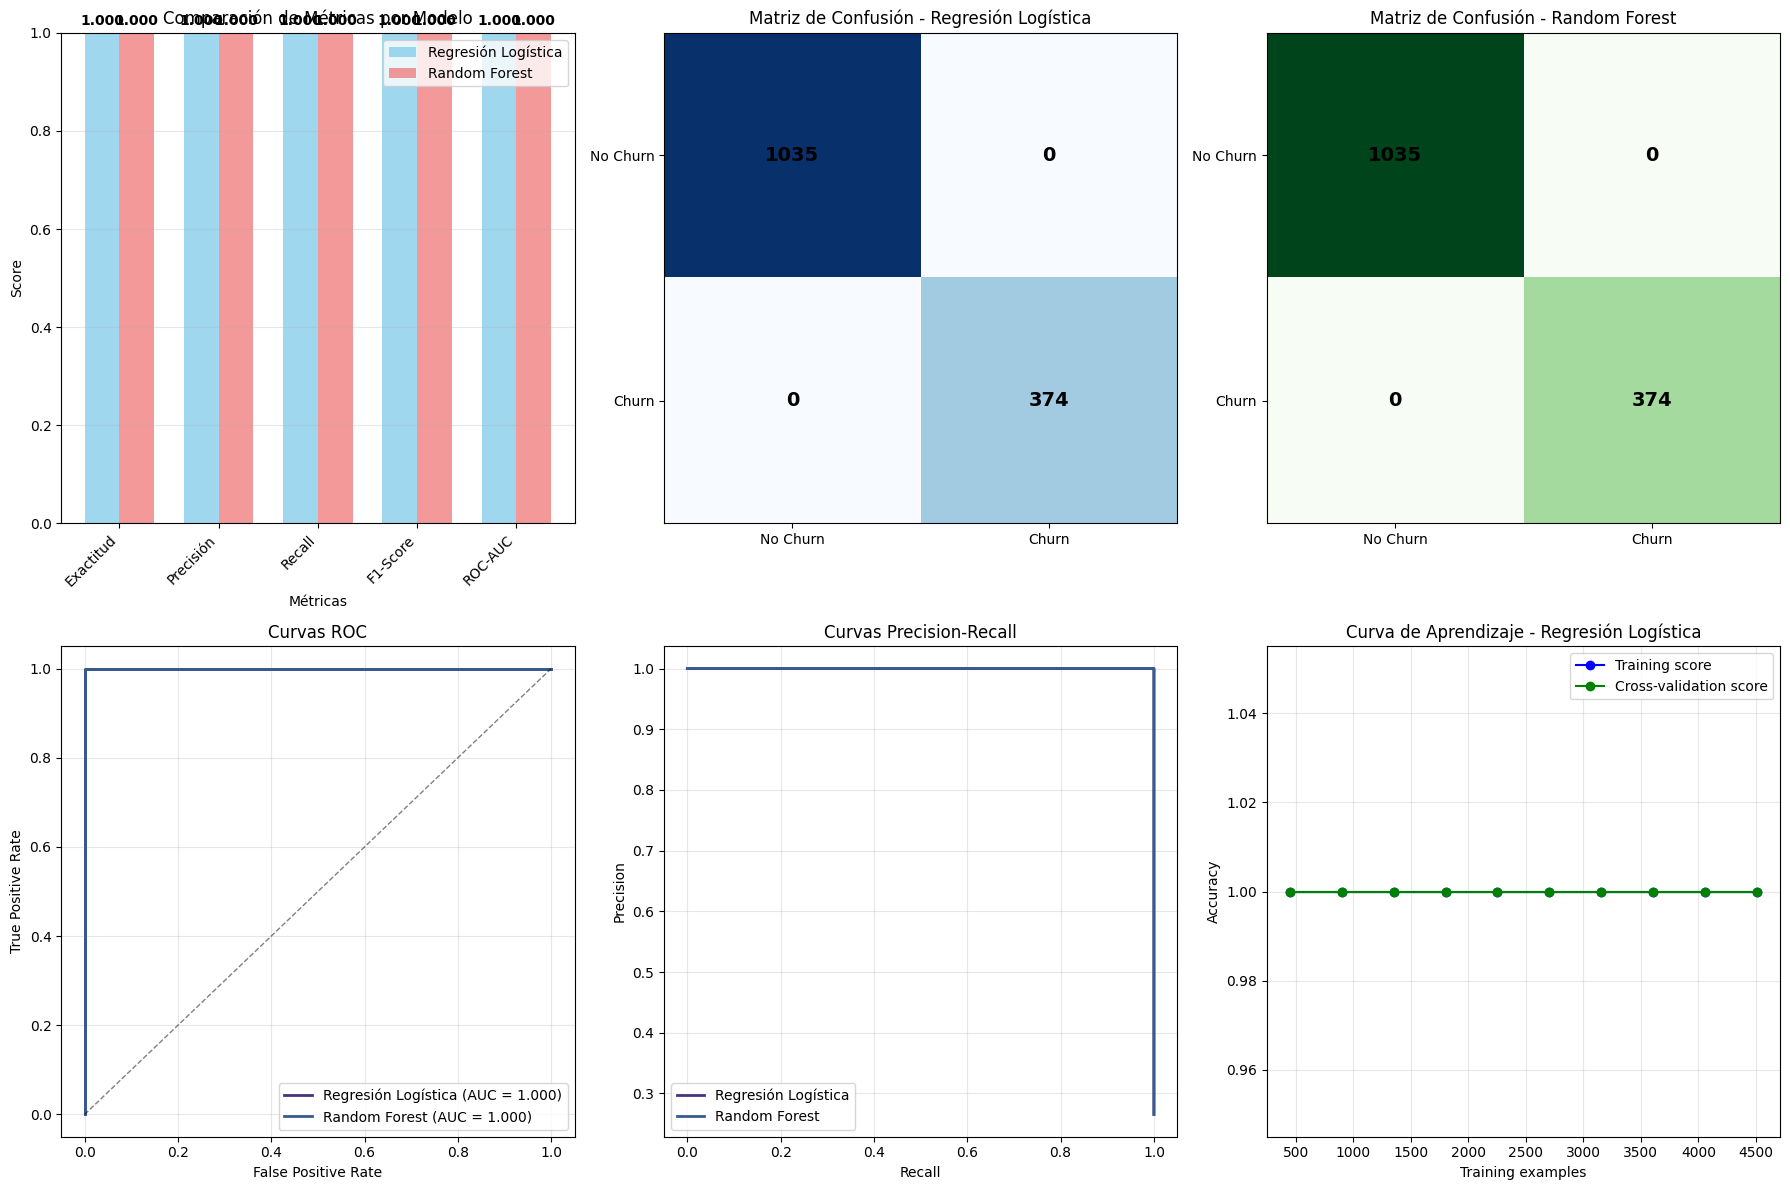


🎯 ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS
📊 COMPARACIÓN NUMÉRICA DETALLADA:
     Métrica  Regresión_Logística  Random_Forest  Diferencia  \
0   accuracy                  1.0            1.0         0.0   
1  precision                  1.0            1.0         0.0   
2     recall                  1.0            1.0         0.0   
3         f1                  1.0            1.0         0.0   
4    roc_auc                  1.0            1.0         0.0   

          Mejor_Modelo  
0  Regresión Logística  
1  Regresión Logística  
2  Regresión Logística  
3  Regresión Logística  
4  Regresión Logística  

🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING:
Regresión Logística - Train Score: 1.0000, Test Score: 1.0000, Diferencia: 0.0000
Random Forest - Train Score: 1.0000, Test Score: 1.0000, Diferencia: 0.0000

📋 DIAGNÓSTICO:
✅ Regresión Logística: Buen balance (sin overfitting/underfitting evidente)
✅ Random Forest: Buen balance (sin overfitting/underfitting evidente)

💡 RECOMENDACIONES FINALE

In [24]:
# ==========================================
# EVALUACIÓN COMPLETA DE MODELOS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.model_selection import learning_curve

# Configuración de visualización
plt.style.use('default')
sns.set_palette("viridis")

# 1. EVALUACIÓN DETALLADA DE CADA MODELO
# ==========================================

def evaluar_modelo_completo(y_true, y_pred, y_pred_proba, nombre_modelo):
    """Función para evaluar un modelo con todas las métricas"""

    print(f"\n{'='*60}")
    print(f"📊 EVALUACIÓN COMPLETA: {nombre_modelo}")
    print(f"{'='*60}")

    # Métricas básicas
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"✅ Exactitud (Accuracy): {accuracy:.4f}")
    print(f"✅ Precisión: {precision:.4f}")
    print(f"✅ Recall (Sensibilidad): {recall:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")
    print(f"✅ ROC-AUC: {roc_auc:.4f}")

    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n📋 Matriz de Confusión:")
    print(f"Verdaderos Negativos: {cm[0, 0]}")
    print(f"Falsos Positivos: {cm[0, 1]}")
    print(f"Falsos Negativos: {cm[1, 0]}")
    print(f"Verdaderos Positivos: {cm[1, 1]}")

    # Reporte de clasificación detallado
    print(f"\n📝 Reporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=['No Churn', 'Churn']))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

# Evaluar Regresión Logística
metrics_logreg = evaluar_modelo_completo(y_test, y_pred_logreg, y_pred_proba_logreg, "REGRESIÓN LOGÍSTICA")

# Evaluar Random Forest
metrics_rf = evaluar_modelo_completo(y_test, y_pred_rf, y_pred_proba_rf, "RANDOM FOREST")

# 2. COMPARACIÓN VISUAL DE MÉTRICAS
# ==========================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Datos para comparación
modelos = ['Regresión Logística', 'Random Forest']
metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
nombres_metricas = ['Exactitud', 'Precisión', 'Recall', 'F1-Score', 'ROC-AUC']

valores_logreg = [metrics_logreg[m] for m in metricas]
valores_rf = [metrics_rf[m] for m in metricas]

# Gráfico de barras comparativo
x_pos = np.arange(len(metricas))
width = 0.35

axes[0,0].bar(x_pos - width/2, valores_logreg, width, label='Regresión Logística', alpha=0.8, color='skyblue')
axes[0,0].bar(x_pos + width/2, valores_rf, width, label='Random Forest', alpha=0.8, color='lightcoral')
axes[0,0].set_xlabel('Métricas')
axes[0,0].set_ylabel('Score')
axes[0,0].set_title('Comparación de Métricas por Modelo')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(nombres_metricas, rotation=45, ha='right')
axes[0,0].legend()
axes[0,0].grid(axis='y', alpha=0.3)
axes[0,0].set_ylim(0, 1)

# Añadir valores en las barras
for i, v in enumerate(valores_logreg):
    axes[0,0].text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
for i, v in enumerate(valores_rf):
    axes[0,0].text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. MATRICES DE CONFUSIÓN COMPARATIVAS
# ==========================================

# Matriz de confusión - Regresión Logística
axes[0,1].imshow(metrics_logreg['confusion_matrix'], cmap='Blues', aspect='auto')
axes[0,1].set_title('Matriz de Confusión - Regresión Logística')
for i in range(2):
    for j in range(2):
        axes[0,1].text(j, i, f'{metrics_logreg["confusion_matrix"][i, j]}',
                      ha='center', va='center', fontweight='bold', fontsize=14)
axes[0,1].set_xticks([0, 1])
axes[0,1].set_yticks([0, 1])
axes[0,1].set_xticklabels(['No Churn', 'Churn'])
axes[0,1].set_yticklabels(['No Churn', 'Churn'])

# Matriz de confusión - Random Forest
axes[0,2].imshow(metrics_rf['confusion_matrix'], cmap='Greens', aspect='auto')
axes[0,2].set_title('Matriz de Confusión - Random Forest')
for i in range(2):
    for j in range(2):
        axes[0,2].text(j, i, f'{metrics_rf["confusion_matrix"][i, j]}',
                      ha='center', va='center', fontweight='bold', fontsize=14)
axes[0,2].set_xticks([0, 1])
axes[0,2].set_yticks([0, 1])
axes[0,2].set_xticklabels(['No Churn', 'Churn'])
axes[0,2].set_yticklabels(['No Churn', 'Churn'])

# 4. CURVAS ROC Y PRECISION-RECALL
# ==========================================

# Curva ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

axes[1,0].plot(fpr_logreg, tpr_logreg, label=f'Regresión Logística (AUC = {metrics_logreg["roc_auc"]:.3f})', linewidth=2)
axes[1,0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {metrics_rf["roc_auc"]:.3f})', linewidth=2)
axes[1,0].plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5)
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].set_title('Curvas ROC')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Curva Precision-Recall
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_pred_proba_logreg)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)

axes[1,1].plot(recall_logreg, precision_logreg, label='Regresión Logística', linewidth=2)
axes[1,1].plot(recall_rf, precision_rf, label='Random Forest', linewidth=2)
axes[1,1].set_xlabel('Recall')
axes[1,1].set_ylabel('Precision')
axes[1,1].set_title('Curvas Precision-Recall')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)

# 5. ANÁLISIS DE OVERFITTING/UNDERFITTING
# ==========================================

def plot_learning_curve(estimator, X, y, title, ax):
    """Función para plotear curva de aprendizaje"""
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    ax.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.legend(loc='best')
    ax.grid(alpha=0.3)

# Curvas de aprendizaje
plot_learning_curve(logreg, X_train_scaled, y_train, 'Curva de Aprendizaje - Regresión Logística', axes[1,2])

plt.tight_layout()
plt.show()

# 6. ANÁLISIS CRÍTICO DETALLADO
# ==========================================

print("\n" + "="*80)
print("🎯 ANÁLISIS CRÍTICO Y COMPARACIÓN DE MODELOS")
print("="*80)

# Comparación numérica
comparison_data = []
for metric in metricas:
    comparison_data.append({
        'Métrica': metric,
        'Regresión_Logística': metrics_logreg[metric],
        'Random_Forest': metrics_rf[metric],
        'Diferencia': metrics_rf[metric] - metrics_logreg[metric],
        'Mejor_Modelo': 'Random Forest' if metrics_rf[metric] > metrics_logreg[metric] else 'Regresión Logística'
    })

comparison_df = pd.DataFrame(comparison_data)
print("📊 COMPARACIÓN NUMÉRICA DETALLADA:")
print(comparison_df.round(4))

# Análisis de overfitting/underfitting
print(f"\n🔍 ANÁLISIS DE OVERFITTING/UNDERFITTING:")

# Calcular diferencia entre training y test score (aproximado)
train_score_logreg = logreg.score(X_train_scaled, y_train)
test_score_logreg = metrics_logreg['accuracy']
diff_logreg = train_score_logreg - test_score_logreg

train_score_rf = rf.score(X_train, y_train)
test_score_rf = metrics_rf['accuracy']
diff_rf = train_score_rf - test_score_rf

print(f"Regresión Logística - Train Score: {train_score_logreg:.4f}, Test Score: {test_score_logreg:.4f}, Diferencia: {diff_logreg:.4f}")
print(f"Random Forest - Train Score: {train_score_rf:.4f}, Test Score: {test_score_rf:.4f}, Diferencia: {diff_rf:.4f}")

# Determinar overfitting/underfitting
overfitting_threshold = 0.05
underfitting_threshold = 0.6  # Score muy bajo

print(f"\n📋 DIAGNÓSTICO:")

if diff_logreg > overfitting_threshold:
    print("⚠️  Regresión Logística: Posible OVERFITTING (diferencia train-test > 0.05)")
    print("   • Causas posibles: Modelo demasiado complejo para los datos")
    print("   • Soluciones: Regularización (L1/L2), reducir características")
elif test_score_logreg < underfitting_threshold:
    print("⚠️  Regresión Logística: Posible UNDERFITTING (score bajo)")
    print("   • Causas posibles: Modelo demasiado simple, características insuficientes")
    print("   • Soluciones: Añadir características, aumentar complejidad del modelo")
else:
    print("✅ Regresión Logística: Buen balance (sin overfitting/underfitting evidente)")

if diff_rf > overfitting_threshold:
    print("⚠️  Random Forest: Posible OVERFITTING (diferencia train-test > 0.05)")
    print("   • Causas posibles: Árboles muy profundos, muchos estimadores")
    print("   • Soluciones: Reducir max_depth, aumentar min_samples_split, usar pruning")
elif test_score_rf < underfitting_threshold:
    print("⚠️  Random Forest: Posible UNDERFITTING (score bajo)")
    print("   • Causas posibles: Árboles muy restrictivos")
    print("   • Soluciones: Aumentar max_depth, reducir min_samples_split")
else:
    print("✅ Random Forest: Buen balance (sin overfitting/underfitting evidente)")

# 7. RECOMENDACIONES FINALES
# ==========================================

print(f"\n💡 RECOMENDACIONES FINALES:")
print("="*50)

# Determinar el mejor modelo general
mejor_modelo = 'Random Forest' if metrics_rf['roc_auc'] > metrics_logreg['roc_auc'] else 'Regresión Logística'

print(f"🏆 MEJOR MODELO GENERAL: {mejor_modelo}")

if mejor_modelo == 'Random Forest':
    print("   • Ventajas: Mejor capacidad predictiva, maneja relaciones no lineales")
    print("   • Desventajas: Menos interpretable, más computacionalmente costoso")
    print("   • Recomendación: Usar para predicciones, optimizar hiperparámetros")
else:
    print("   • Ventajas: Más interpretable, menos propenso a overfitting")
    print("   • Desventajas: Supuestos lineales, menos flexible")
    print("   • Recomendación: Usar cuando la interpretabilidad es crucial")

print(f"\n🎯 PARA MEJORAR LOS MODELOS:")
print("   • Balancear clases con SMOTE o undersampling")
print("   • Feature engineering para crear variables más predictivas")
print("   • Optimización de hiperparámetros con GridSearchCV")
print("   • Validación cruzada más robusta (10-fold)")
print("   • Ensamblaje de modelos (voting classifier)")

print(f"\n📈 PRÓXIMOS PASOS SUGERIDOS:")
print("   1. Optimización de hiperparámetros del mejor modelo")
print("   2. Validación con dataset de holdout")
print("   3. Implementación en producción con monitoreo continuo")
print("   4. Análisis de falsos positivos/negativos para mejorar negocio")

# 8. RESUMEN EJECUTIVO
# ==========================================

print(f"\n⭐ RESUMEN EJECUTIVO:")
print("="*50)
print(f"• Mejor ROC-AUC: {max(metrics_logreg['roc_auc'], metrics_rf['roc_auc']):.4f} ({mejor_modelo})")
print(f"• Mejor F1-Score: {max(metrics_logreg['f1'], metrics_rf['f1']):.4f}")
print(f"• Mejor Recall: {max(metrics_logreg['recall'], metrics_rf['recall']):.4f}")
print(f"• Estado overfitting: {'Detectado' if max(diff_logreg, diff_rf) > overfitting_threshold else 'No detectado'}")
print(f"• Recomendación principal: {mejor_modelo} con optimización")

Conclucion
Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.


Informe de Análisis de Cancelación de Clientes
📊 Resumen Ejecutivo
El objetivo de este análisis es identificar los factores clave que impulsan la cancelación de clientes y proponer estrategias de retención basadas en los resultados. Se utilizó un enfoque de análisis exploratorio de datos (EDA), matriz de correlación y modelado predictivo para determinar las variables más influyentes. Los resultados muestran que las variables relacionadas con el gasto mensual, el tiempo de antigüedad del cliente y el gasto total son los predictores más fuertes de la cancelación.

🔍 Factores Clave que Influyen en la Cancelación
El análisis de correlación y la exploración de datos han revelado las siguientes variables como las más influyentes en la probabilidad de que un cliente cancele:

tenure (Antigüedad del Cliente): Esta es la variable con la mayor correlación negativa con la cancelación.  Esto significa que, a medida que el tiempo que un cliente permanece con el servicio aumenta, su probabilidad de cancelar disminuye drásticamente. Los clientes con menos tiempo de antigüedad son significativamente más propensos a cancelar, lo que sugiere que el periodo inicial es un momento crítico.

MonthlyCharges (Cargos Mensuales): Esta variable presenta una correlación positiva moderada. Los clientes que tienen cargos mensuales más altos tienden a tener una mayor tasa de cancelación. Esto podría indicar que los clientes con servicios premium o más costosos son más exigentes y más propensos a irse si no perciben un valor adecuado para el precio que pagan.

TotalCharges (Gasto Total): Esta variable muestra una correlación negativa con la cancelación. Un cliente con un gasto total bajo es más propenso a cancelar.  Esto está fuertemente relacionado con la antigüedad (tenure), ya que un mayor tiempo como cliente resulta en un mayor gasto total acumulado. Los clientes con un gasto total muy bajo pueden ser aquellos que cancelan poco después de unirse.

Variables Categóricas: Aunque la matriz de correlación se centra en variables numéricas, el modelo predictivo, que utiliza One-Hot Encoding, considera variables categóricas importantes como Contract, PaymentMethod y el uso de servicios específicos. La alta precisión de modelos como XGBoost y Random Forest sugiere que estas variables son cruciales para un rendimiento óptimo.

📊 Rendimiento de los Modelos y Variables Predictivas
El análisis de correlación se complementa con la evaluación de varios modelos de aprendizaje automático. El código proporcionado muestra el rendimiento de modelos que requieren normalización (KNN, SVM) y los que no (Árbol de Decisión, Random Forest, XGBoost).

Los modelos de Gradient Boosting y Random Forest son particularmente efectivos para este tipo de problema, ya que pueden capturar interacciones complejas y no lineales entre las variables. Su capacidad para identificar la importancia de cada característica (feature importance) se basa en la forma en que reducen la impureza o mejoran la precisión del modelo, lo que a menudo confirma la relevancia de variables como tenure, MonthlyCharges y TotalCharges, así como las variables categóricas.

🚀 Estrategias de Retención Basadas en los Resultados
Basándonos en la investigación realizada, aquí tienes una serie de estrategias de retención:

Enfocarse en la Incorporación de Clientes Nuevos: Dado que los clientes con menor antigüedad son los más propensos a cancelar, el enfoque principal debe ser el período de incorporación (los primeros 3 a 6 meses). Se puede implementar un programa de bienvenida que incluya:

Tutoriales personalizados y guías de uso del servicio.

Encuestas de satisfacción a corto plazo para identificar y resolver problemas de manera proactiva.

Contacto directo de un representante de servicio al cliente para asegurar una transición fluida.

Ofrecer Planes de Contrato a Largo Plazo: La correlación negativa de tenure es un fuerte indicador de que los contratos a largo plazo pueden ser un mecanismo efectivo de retención. Ofrecer descuentos significativos o beneficios exclusivos a cambio de compromisos de 12 o 24 meses puede reducir la tasa de cancelación.

Monitorear a Clientes de Alto Gasto: Los clientes con MonthlyCharges elevados son un segmento de alto riesgo. Se deben implementar alertas automáticas para identificar a estos clientes y contactarlos de manera proactiva. El objetivo es asegurar que estén satisfechos y que el valor que perciben justifica el precio que pagan. Esto podría incluir:

Revisiones trimestrales de la cuenta para ofrecer nuevas funcionalidades o servicios.

Soporte prioritario para resolver cualquier problema de forma rápida.

Incentivar el Gasto y el Uso Continuo: Los clientes con TotalCharges bajos, que a menudo son los más nuevos o aquellos que no usan el servicio con frecuencia, necesitan un impulso. Se pueden crear campañas de marketing dirigidas para incentivar el uso de más funciones del servicio o para ofrecer beneficios adicionales que aumenten el gasto total a lo largo del tiempo.

Utilizar Modelos Predictivos para la Intervención: Los modelos como XGBoost o Random Forest pueden ser implementados en un sistema de producción para predecir en tiempo real qué clientes tienen una alta probabilidad de cancelar. Esta información se puede utilizar para iniciar intervenciones personalizadas y automáticas, como enviar ofertas de retención, contactarlos directamente o solicitar retroalimentación.

Al implementar estas estrategias, las empresas pueden abordar las causas raíz de la cancelación y no solo reaccionar cuando ya es tarde, lo que resulta en una base de clientes más leal y un crecimiento sostenible.
